In [42]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [43]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset=load_diabetes()
print(diabetes_dataset['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [44]:
# Save the input and target variables
print(diabetes_dataset.keys())
data=diabetes_dataset['data']
target=diabetes_dataset['target']


dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [45]:
# Normalise the target data (this will make clearer training curves)
target=(target-target.mean(axis=0))/target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [46]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1
                                                              )
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [10]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128,activation='relu',input_shape=(train_data.shape[1],)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1)
    ])
    return model
model=get_model()

In [11]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [12]:
# Compile the model

model.compile(optimizer='adam',loss='mse',metrices=['mae'])

In [18]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data,train_target,epochs=100,validation_split=0.15,batch_size=64,verbose=False)


In [19]:
# Evaluate the model on the test set
model.evaluate(test_data,test_target,verbose=2)


45/1 - 0s - loss: 3213.4636


3357.9664225260417

#### Plot the learning curves

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

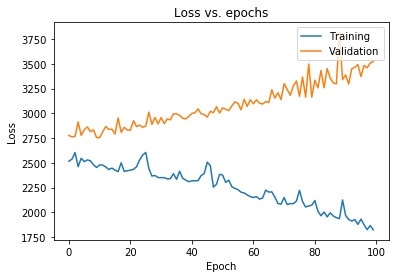

In [20]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [48]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers  

In [68]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dense(1)
    ])
    return model

In [69]:
# Re-build the model with weight decay and dropout layers
model=get_regularised_model(1e-5,0.03)


In [32]:
# Compile the model
model.compile(optimizer='adam',loss='mae',metrices=['mae'])


In [34]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data,train_target,epochs=100,validation_split=0.15,
                   batch_size=64,verbose=False)


In [37]:
# Evaluate the model on the test set
model.evaluate(test_data,test_target,verbose=2)


45/1 - 0s - loss: 39.7729


42.49114939371745

#### Plot the learning curves

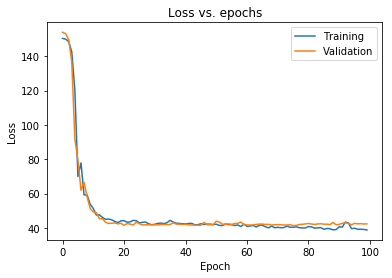

In [38]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [60]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback
class TrainingCallback(Callback):
    def on_training_begin(self,logs=None):
        print("Starting Training....")
    def on_epoch_begin(self,epoch,logs=None):
        print(f"Starting epoch {epoch}")
    def on_train_batch_begin(self,batch,logs=None):
        print(f"Traning batch{batch} start")
    def on_train_bath_end(self,batch,logs=None):
        print(f"Traning Batch {batch} end")
        
    def on_epoch_end(self,epoch,logs=None):
        print(f'Finished Epoch{epoch}')

In [56]:
# Re-build the model
model=get_regularised_model(1e-5,0.3)


In [57]:
# Compile the model
model.compile(optimizer='adam',loss='mae')


#### Train the model with the callback

In [61]:
# Train the model, with some of the data reserved for validation
model.fit(train_data,train_target,epochs=3,batch_size=128,verbose=False,callbacks=[TrainingCallback()])


Starting epoch 0
Traning batch0 start
Traning batch1 start
Traning batch2 start
Traning batch3 start
Finished Epoch0
Starting epoch 1
Traning batch0 start
Traning batch1 start
Traning batch2 start
Traning batch3 start
Finished Epoch1
Starting epoch 2
Traning batch0 start
Traning batch1 start
Traning batch2 start
Traning batch3 start
Finished Epoch2


In [62]:
# Evaluate the model

model.evaluate(test_data,test_target,verbose=False)

0.7352282669809129

In [63]:
# Make predictions with the model

model.predict(test_data,verbose=False)

array([[-0.15126087],
       [-0.10785937],
       [-0.19030136],
       [-0.09924876],
       [-0.16100796],
       [-0.0438607 ],
       [-0.1416585 ],
       [-0.08261964],
       [-0.08300314],
       [-0.15194388],
       [-0.08272474],
       [-0.06372903],
       [-0.17614003],
       [-0.12653038],
       [-0.10882099],
       [-0.11151698],
       [-0.12931658],
       [-0.08809485],
       [-0.07530813],
       [-0.08860353],
       [-0.08860923],
       [-0.14368945],
       [-0.06910395],
       [-0.12272337],
       [-0.12227991],
       [-0.07368383],
       [-0.15080832],
       [-0.13169317],
       [-0.13475612],
       [-0.03384825],
       [-0.06415989],
       [-0.13587222],
       [-0.15144801],
       [-0.1378469 ],
       [-0.13135938],
       [-0.20225638],
       [-0.08671076],
       [-0.04672359],
       [-0.06242995],
       [-0.10834229],
       [-0.09302124],
       [-0.15622564],
       [-0.15414406],
       [-0.14307518],
       [-0.16254936]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [66]:
# Re-train the unregularised model
unregularised_model=get_model()
unregularised_model.compile(optimizer='adam',loss='mse')
unreg_history=unregularised_model.fit(train_data,train_target,epochs=100,
                                     validation_split=0.15,batch_size=64,
                                     verbose=2,
                                     callbacks=[tf.keras.callbacks.EarlyStopping()])

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 1.0042 - val_loss: 0.9133
Epoch 2/100
337/337 - 0s - loss: 0.8670 - val_loss: 0.7407
Epoch 3/100
337/337 - 0s - loss: 0.6816 - val_loss: 0.5811
Epoch 4/100
337/337 - 0s - loss: 0.5757 - val_loss: 0.5293
Epoch 5/100
337/337 - 0s - loss: 0.5241 - val_loss: 0.4784
Epoch 6/100
337/337 - 0s - loss: 0.4877 - val_loss: 0.4749
Epoch 7/100
337/337 - 0s - loss: 0.4693 - val_loss: 0.5135


In [73]:
# Evaluate the model on the test set
regularised_model=get_regularised_model(10e-8,0.2)
regularised_model.compile(optimizer='adam',loss='mae')
reg_history=regularised_model.fit(train_data,train_target,epochs=100,
                                     validation_split=0.15,batch_size=64,
                                     verbose=2,
                                     callbacks=[tf.keras.callbacks.EarlyStopping()])

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 0.8666 - val_loss: 0.8277
Epoch 2/100
337/337 - 0s - loss: 0.8516 - val_loss: 0.8080
Epoch 3/100
337/337 - 0s - loss: 0.8118 - val_loss: 0.7477
Epoch 4/100
337/337 - 0s - loss: 0.7147 - val_loss: 0.6216
Epoch 5/100
337/337 - 0s - loss: 0.6542 - val_loss: 0.7024


In [ ]:
# Re-train the regularised model



In [71]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data,test_target,verbose=2)

45/1 - 0s - loss: 0.5197


0.5836876120832232

#### Plot the learning curves

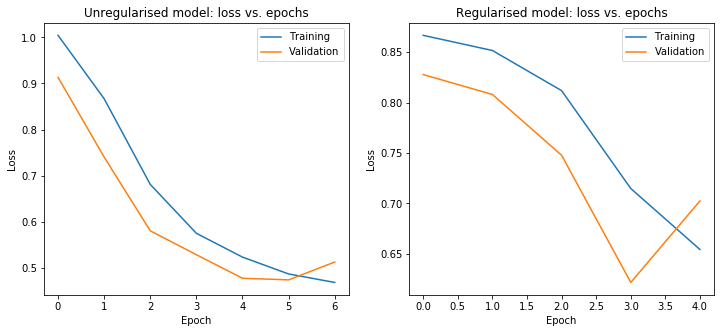

In [74]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()